# Getting predicions

This notebook load the models and apply them on a sample of 10 instances from the 'subtest_tng300.csv' file.


The input data must be sorted according to: Virial mass, Concentration, Spin, Age, Overdensity,

as a pandas.DataFrame with columns named as: `[M_h, C_h, S_h, z_h, Delta3_h]`.

## Importing the libraries

In [2]:
from NF import NF
from NNgauss import NNgauss
#from NNclass import NNclass

import pandas as pd
import matplotlib.pyplot as plt

import warnings

GPU is available and will be used by PyTorch.


2024-10-21 14:13:35.967991: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-21 14:13:35.974654: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 14:13:35.982324: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 14:13:35.984697: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-21 14:13:35.991049: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
warnings.filterwarnings('ignore')

## Loading data

In [2]:
dataset = pd.read_csv('data/subtest_tng300.csv')

In [3]:
dataset.head()

,ID,X_h,Y_h,Z_h,M_h,C_h,S_h,z_h,Delta3_h,x_g,y_g,z_g,smass,color,radius,sSFR
0,148942.0,37.155465,83.731352,156.890562,11.230634,0.949239,0.102213,0.909091,9.760820,37.155464,83.731354,156.890564,9.020804,0.441576,0.428343,-9.636042
1,143805.0,62.748066,184.040500,188.505172,11.193012,0.978603,0.057343,1.333333,1.123779,62.748066,184.040497,188.505173,8.825384,0.075232,0.266293,-9.731375
2,37609.0,191.439203,117.276422,130.288531,11.963388,1.061022,0.012275,1.575758,2.584691,191.439209,117.276421,130.288528,10.391277,1.130091,0.482415,-12.301883
3,48567.0,76.807563,143.693719,179.001844,11.788298,1.047671,0.069209,1.818182,0.915077,76.807564,143.693726,179.001846,10.166031,0.910177,0.774072,-11.408447
4,92208.0,177.415203,11.204672,30.818141,11.464064,1.117278,0.067701,2.242424,1.284318,177.415207,11.204672,30.818140,9.647124,1.016806,0.679863,-10.740095


## Selecting data

In [4]:
# Properties
target_props = ['smass', 'color', 'sSFR', 'radius']
input_props = ['M_h', 'C_h', 'S_h', 'z_h', 'Delta3_h']

input_data = dataset[input_props].to_numpy()

## Loading the models

In [5]:
nngauss = NNgauss(target_props, trial=45)
nf = NF(target_props, trial=99)
#nnclass = NNclass(target_props, trial=77)

## Getting the predictions

The output shape is `(n_samples, n_simulations, n_dimensions)`

In [6]:
nngauss_pred = nngauss.get_sample(input_data, n_samples=10)

I0000 00:00:1729530777.627589  380354 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-21 14:12:57.631176: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [7]:
nf_pred = nf.get_sample(input_data, n_samples=10)

# instance: 0


In [8]:
#nnclass_pred = nnclass.get_sample(input_data, 5, 2)

In [15]:
nf_pred.shape, nngauss_pred.shape

((10, 10, 4), (10, 10, 4))

## Linear comparison

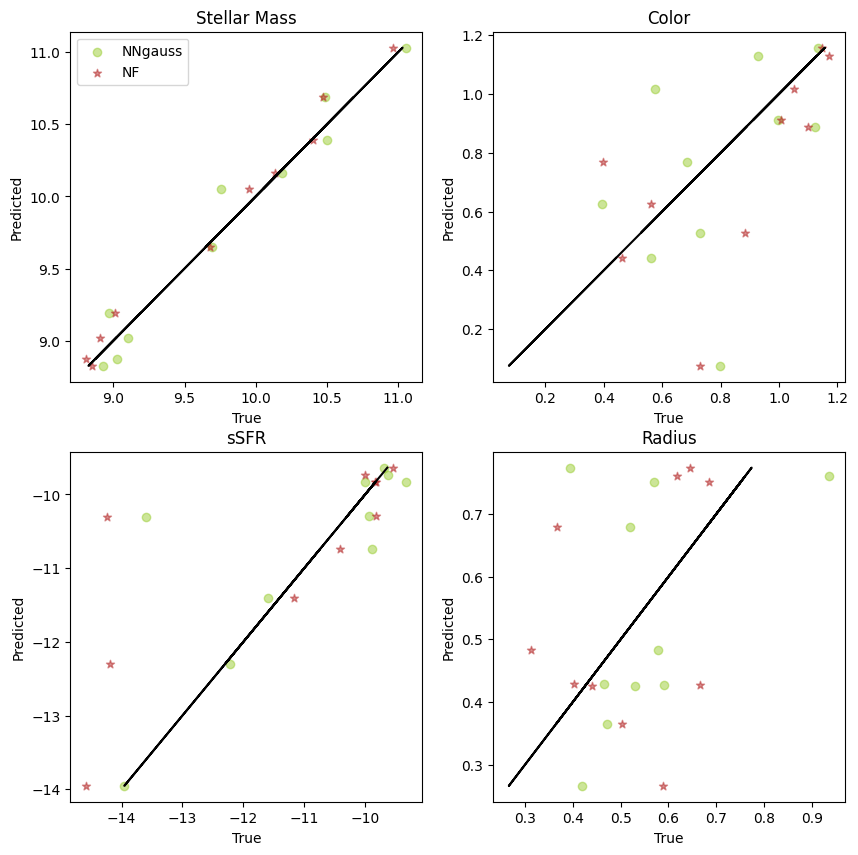

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=100)

# Stellar Mass
nf_smass = nf_pred[0, :, 0]
nngauss_smass = nngauss_pred[0, :, 0]

axs[0, 0].set_title('Stellar Mass')
axs[0, 0].plot(dataset['smass'], dataset['smass'], color='black', ls='--')
axs[0, 0].scatter(nngauss_smass, dataset['smass'], color=nngauss.color, label=nngauss.label, marker=nngauss.marker, alpha=0.5)
axs[0, 0].scatter(nf_smass, dataset['smass'], color=nf.color, label=nf.label, marker=nf.marker, alpha=0.5)
axs[0, 0].legend()
axs[0, 0].set_ylabel('Predicted')
axs[0, 0].set_xlabel('True')

# Color
nf_color = nf_pred[0, :, 1]
nngauss_color = nngauss_pred[0, :, 1]

axs[0, 1].set_title('Color')
axs[0, 1].plot(dataset['color'], dataset['color'], color='black', ls='--')
axs[0, 1].scatter(nngauss_color, dataset['color'], color=nngauss.color, label=nngauss.label, marker=nngauss.marker, alpha=0.5)
axs[0, 1].scatter(nf_color, dataset['color'], color=nf.color, label=nf.label, marker=nf.marker, alpha=0.5)
axs[0, 1].set_ylabel('Predicted')
axs[0, 1].set_xlabel('True')

# sSFR
nf_sSFR = nf_pred[0, :, 2]
nngauss_sSFR = nngauss_pred[0, :, 2]

axs[1, 0].set_title('sSFR')
axs[1, 0].plot(dataset['sSFR'], dataset['sSFR'], color='black', ls='--')
axs[1, 0].scatter(nngauss_sSFR, dataset['sSFR'], color=nngauss.color, label=nngauss.label, marker=nngauss.marker, alpha=0.5)
axs[1, 0].scatter(nf_sSFR, dataset['sSFR'], color=nf.color, label=nf.label, marker=nf.marker, alpha=0.5)
axs[1, 0].set_ylabel('Predicted')
axs[1, 0].set_xlabel('True')

# Radius
nf_radius = nf_pred[0, :, 3]
nngauss_radius = nngauss_pred[0, :, 3]

axs[1, 1].set_title('Radius')
axs[1, 1].plot(dataset['radius'], dataset['radius'], color='black', ls='--')
axs[1, 1].scatter(nngauss_radius, dataset['radius'], color=nngauss.color, label=nngauss.label, marker=nngauss.marker, alpha=0.5)
axs[1, 1].scatter(nf_radius, dataset['radius'], color=nf.color, label=nf.label, marker=nf.marker, alpha=0.5)
axs[1, 1].set_ylabel('Predicted')
axs[1, 1].set_xlabel('True')

plt.savefig('results/linear_comparison.png')

# Example: missing 'Delta3_h'

In [23]:
from missing_features import check_input_data

In [25]:
input_props = ['M_h', 'C_h', 'S_h', 'z_h']
input_data = dataset[input_props]

input_data = check_input_data(input_data)

Missing features: ['Delta3_h']. Generating "fake" input features...


In [21]:
nngauss_pred = nngauss.get_sample(input_data, n_samples=10)
nf_pred = nf.get_sample(input_data, n_samples=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
# instance: 0
